carregamento de dados através da wikipedia

In [1]:
import pandas as pd
import wikipedia as wp
import numpy as np
import matplotlib as plt
%matplotlib inline

uri1 = "https://en.wikipedia.org/wiki/Tour_of_Flanders"
uri2 = "https://fr.wikipedia.org/wiki/Paris-Roubaix"

flandres = pd.read_html(uri1)[4]
roubaix = pd.read_html(uri2)[6]


# Limpeza dos dados e mundança nos dataframes

Começar pela limpeza dos dados, no dataframe da Flandres. Desta forma, uma vez que o datafram continha uma coluna a mais, procedi à eliminação dessa coluna. Uma vez que no periodo da primeira guerra mundial não existiu corrida, procedi à eliminação dessa linha, de forma a ter um dataframe apenas com as corridas realizadas.

In [2]:
flandres = flandres.drop(["Unnamed: 4"], axis = 1) # eliminação da coluna

In [3]:
flandres = flandres.drop(flandres.index[2]) # eliminação da linha de acordo com o index

In [4]:
flandres = flandres.drop(flandres.index[-1]) # eliminação da última linha 

No dataframe de Roubaix, começamos pela mudança nos nomes do cabeçalho e com a limpeza dos dados. Os cabeçalhos das colunas apresentavam-se em francês e mudei para inglês, de forma a manter tudo na mesma língua.


In [5]:
roubaix = roubaix.rename({"Vainqueur": "Winner"}, axis = 1)
roubaix = roubaix.rename({u'Année': "Year"}, axis = 1)
roubaix = roubaix.rename({u'Deuxième': "Second"}, axis = 1)
roubaix = roubaix.rename({u'Troisième': "Third"}, axis = 1)

In [6]:
roubaix = roubaix.drop(roubaix.index[19])

In [7]:
roubaix = roubaix.drop(roubaix.index[40])

In [8]:
roubaix = roubaix.drop(roubaix.index[-1])

# Primeira visualização nos dados e criação dos primeiros gráficos

Nesta fase do processo, vou começar por fazer os primeiros gráficos de forma a perceber como posso tratar estes dados e que primeiras informações posso retirar.

In [9]:
Winners = flandres["Rider"].value_counts() #organiza de acordo com quem tem mais vitórias

[Text(0,0,u'Tom Boonen'),
 Text(0,0,u'Fiorenzo Magni'),
 Text(0,0,u'Eric Leman'),
 Text(0,0,u'Achiel Buysse'),
 Text(0,0,u'Johan Museeuw'),
 Text(0,0,u'Fabian Cancellara'),
 Text(0,0,u'Jan Raas'),
 Text(0,0,u'Gerard Debaets'),
 Text(0,0,u'Rik Van Steenbergen'),
 Text(0,0,u'Eddy Merckx'),
 Text(0,0,u'Walter Godefroot'),
 Text(0,0,u'Stijn Devolder'),
 Text(0,0,u'Briek Schotte'),
 Text(0,0,u'Romain Gijssels'),
 Text(0,0,u'Peter van Petegem'),
 Text(0,0,u'Edwig van Hooydonck'),
 Text(0,0,u'Rik Van Looy'),
 Text(0,0,u'Walter Planckaert'),
 Text(0,0,u'Adri van der Poel')]

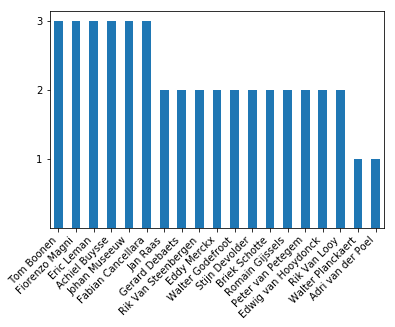

In [10]:
w = Winners[0:19].plot(kind = "bar", yticks = [1,2,3])
w.set_xticklabels(w.get_xticklabels(), rotation = 45, horizontalalignment = "right")

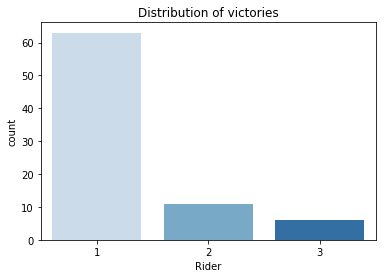

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(Winners)
plt.title("Distribution of victories")
palette = sns.color_palette("Blues", 3)
sns.countplot(Winners, palette = palette)

[Text(0,0,u'Belgium'),
 Text(0,0,u'Italy'),
 Text(0,0,u'Netherlands'),
 Text(0,0,u'Switzerland'),
 Text(0,0,u'France'),
 Text(0,0,u'Germany'),
 Text(0,0,u'Great Britain'),
 Text(0,0,u'Norway'),
 Text(0,0,u'Denmark'),
 Text(0,0,u'Slovakia')]

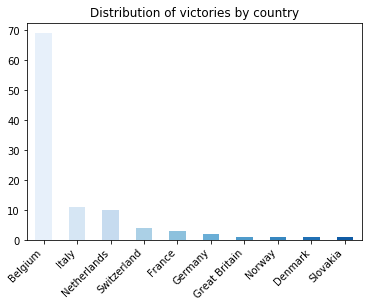

In [12]:
winners_countries = flandres["Country"].value_counts()
plt.title("Distribution of victories by country")
palette = sns.color_palette("Blues", 11)
p = winners_countries.plot(kind = "bar", color = palette)
p.set_xticklabels(p.get_xticklabels(), rotation = 45, horizontalalignment = "right")

Visualização de dados de Roubaix

In [13]:
roubaix.columns

Index([u'Year', u'Winner', u'Second', u'Third'], dtype='object')

Apresentação dos ciclistas que ganharam mais vezes o Paris-Roubaix

In [14]:
winners_roubaix = roubaix["Winner"].value_counts() #organiza de acordo com quem tem mais vitórias

--
--


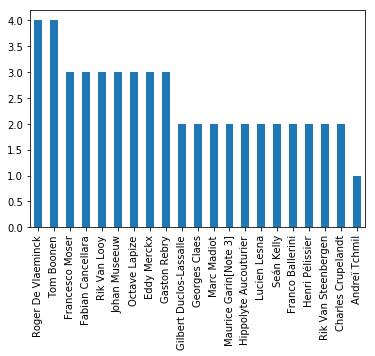

In [27]:
win_roubaix = winners_roubaix[0:21].plot(kind = "bar")

Ciclistas que fizeram mais vezes segundo lugar

In [16]:
second_roubaix = roubaix["Second"].value_counts()

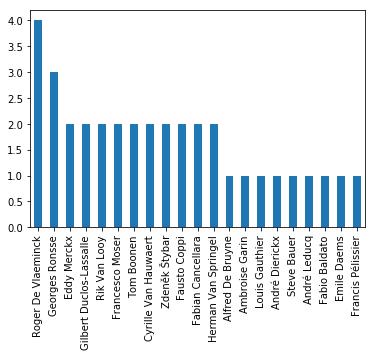

In [17]:
second_roubaix = second_roubaix[0:21].plot(kind = "bar")

Ciclistas que fizeram maus vezes terceiro lugar

In [18]:
third_roubaix = roubaix["Third"].value_counts()

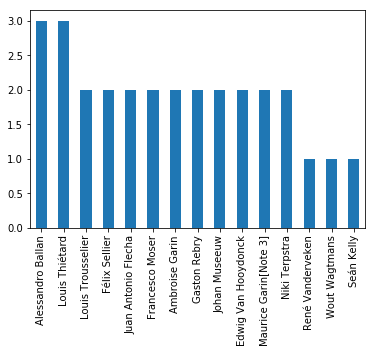

In [19]:
third_roubaix = third_roubaix[0:15].plot(kind = "bar")

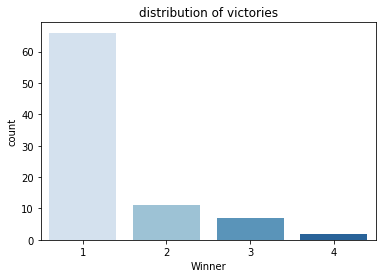

In [20]:
sns.countplot(winners_roubaix)
plt.title("distribution of victories")
palette = sns.color_palette("Blues", 4)
sns.countplot(winners_roubaix, palette = palette)

# Comparação entre as duas corridas

Se quisermos saber quem venceu num determinado ano as duas provas

In [21]:
for index, line in flandres.iterrows():
    for index, line_2 in roubaix.iterrows():
        if (line["Year"] == "1914") & (line_2["Year"] == "1914"):
            print(line["Rider"])
            print(line_2["Winner"])

Marcel Buysse
Charles Crupelandt


Se quisermos identificar quem ganhou no mesmo ano as duas provas

In [22]:
for index, line in flandres.iterrows():
    for index, line_2 in roubaix.iterrows():
        if (line["Rider"] == line_2["Winner"]) and (line["Year"] == line_2["Year"]):
                print(line["Year"])
                print(line["Rider"])
                print(line_2["Year"])
                print(line_2["Winner"])                                                          

1932
Romain Gijssels
1932
Romain Gijssels
1934
Gaston Rebry
1934
Gaston Rebry
1954
Raymond Impanis
1954
Raymond Impanis
1962
Rik Van Looy
1962
Rik Van Looy
1977
Roger De Vlaeminck
1977
Roger De Vlaeminck
2005
Tom Boonen
2005
Tom Boonen
2010
Fabian Cancellara
2010
Fabian Cancellara
2012
Tom Boonen
2012
Tom Boonen
2013
Fabian Cancellara
2013
Fabian Cancellara


In [23]:
flandres.head()

,Year,Country,Rider,Team
0,1913,Belgium,Paul Deman,Automoto–Continental
1,1914,Belgium,Marcel Buysse,Alcyon–Soly
3,1919,Belgium,Henri Vanlerberghe,–
4,1920,Belgium,Jules Van Hevel,–
5,1921,Belgium,René Vermandel,–


In [24]:
roubaix.head(21)

,Year,Winner,Second,Third
0,1896,Josef Fischer,Charles Meyer,Maurice Garin[Note 3]
1,1897,Maurice Garin[Note 3],Mathieu Cordang,Michel Frederick
2,1898,Maurice Garin[Note 3],Auguste Stephane,Édouard Wattelier
3,1899,Albert Champion,Paul Bor,Ambroise Garin
4,1900,Émile Bouhours,Josef Fischer,Maurice Garin[Note 3]
5,1901,Lucien Lesna,Ambroise Garin,Lucien Itsweire
6,1902,Lucien Lesna,Édouard Wattelier,Ambroise Garin
7,1903,Hippolyte Aucouturier,Claude Chapperon,Louis Trousselier
8,1904,Hippolyte Aucouturier,César Garin,Lucien Pothier
9,1905,Louis Trousselier,René Pottier,Henri Cornet


In [25]:
for index, line in flandres.iterrows():
    for index, line_2 in roubaix.iterrows():
        if (line["Rider"] == line_2["Winner"]):
            print(line["Year"])
            print(line_2["Year"])
            print("---")

1913
1920
---
1920
1924
---
1925
1926
---
1931
1932
---
1932
1932
---
1934
1931
---
1934
1934
---
1934
1935
---
1944
1948
---
1944
1952
---
1946
1948
---
1946
1952
---
1954
1954
---
1955
1956
---
1956
1955
---
1959
1961
---
1959
1962
---
1959
1965
---
1962
1961
---
1962
1962
---
1962
1965
---
1968
1969
---
1969
1968
---
1969
1970
---
1969
1973
---
1975
1968
---
1975
1970
---
1975
1973
---
1977
1972
---
1977
1974
---
1977
1975
---
1977
1977
---
1978
1969
---
1979
1982
---
1981
1983
---
1983
1982
---
1985
1987
---
1988
1990
---
1993
1996
---
1993
2000
---
1993
2002
---
1995
1996
---
1995
2000
---
1995
2002
---
1998
1996
---
1998
2000
---
1998
2002
---
2002
1999
---
2005
2005
---
2005
2008
---
2005
2009
---
2005
2012
---
2006
2005
---
2006
2008
---
2006
2009
---
2006
2012
---
2010
2006
---
2010
2010
---
2010
2013
---
2012
2005
---
2012
2008
---
2012
2009
---
2012
2012
---
2013
2006
---
2013
2010
---
2013
2013
---
2014
2006
---
2014
2010
---
2014
2013
---
2016
2018
---
2017
2019
---
2018
2